# LAB4
## Fi-31 Burma Sofia 

In [267]:
import numpy as np 
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

### 1. Erosion (ерозiя).

In [268]:
def erosion(image, struct_element):
    
    img_height, img_width = image.shape
    struct_element_height, struct_element_width = struct_element.shape

    pad_height = struct_element_height // 2
    pad_width = struct_element_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output = image.copy()
    
    for i in range(img_height):
        for j in range(img_width):
            
                region = padded_image[i:i + struct_element_height, j:j + struct_element_width]
                if np.all(region[struct_element == 1]):  
                    output[i, j] = 1
                else:
                    output[i, j] = 0

    return output

### 2. Dilation (нарощування).

In [269]:
def  dilation(image, struct_element):
    
    img_height, img_width = image.shape
    struct_element_height, struct_element_width = struct_element.shape

    pad_height = struct_element_height // 2
    pad_width = struct_element_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)
    output = image.copy()
    
    for i in range(img_height):
        for j in range(img_width):
            
                region = padded_image[i:i + struct_element_height, j:j + struct_element_width]
                if np.any(region[struct_element == 1]):  
                    output[i, j] = 1
                else:
                    output[i, j] = 0


    return output

### 3. Opening (розмикання).

In [270]:
def opening(image, struct_element):
    
    output_1 = erosion(image, struct_element )
    output_2 = dilation(output_1, struct_element )

    return output_2

### 4. Closing (замикання).

In [271]:
def closing(image, struct_element):
    
    output_1 = dilation(image, struct_element )
    output_2 = erosion(output_1, struct_element )

    return output_2

### 5. Границi.

In [272]:
def borders(image, struct_element):
    
    output_1 = dilation(image, struct_element )
    output_2 = erosion(output_1, struct_element )
    
    output_3 = output_1 - output_2
    
    return output_3

### Результат


In [273]:
img_1 = cv2.imread("images/sun.jpg")
gray_img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

struct_element_1_1 = np.full((10, 10), 1)
struct_element_1_2 = np.full((5, 5), 1)

erosion_img_1 = erosion(gray_img_1, struct_element_1_1 )
dilation_img_1 = dilation(gray_img_1, struct_element_1_2 )
opening_img_1 = opening(gray_img_1, struct_element_1_1 )
closing_img_1 = closing(gray_img_1, struct_element_1_2 )
borders_img_1 = borders(gray_img_1, struct_element_1_2 )


In [274]:
img_2 = cv2.imread("images/owl.jpg")
gray_img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

struct_element_2_1 = np.full((10, 10), 1)
struct_element_2_2 = np.full((2, 2), 1)

erosion_img_2 = erosion(gray_img_2, struct_element_2_1)
dilation_img_2 = dilation(gray_img_2, struct_element_2_2)
opening_img_2 = opening(gray_img_2, struct_element_2_1)
closing_img_2 = closing(gray_img_2, struct_element_2_2)
borders_img_2 = borders(gray_img_2, struct_element_2_2)

In [275]:
img_3 = cv2.imread("images/rainbow.jpg")
gray_img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2GRAY)

struct_element_3_1 = np.full((10, 10), 1)
struct_element_3_2 = np.full((5, 5), 1)

erosion_img_3 = erosion(gray_img_3, struct_element_3_1)
dilation_img_3 = dilation(gray_img_3, struct_element_3_2)
opening_img_3 = opening(gray_img_3, struct_element_3_1)
closing_img_3 = closing(gray_img_3, struct_element_3_2)
borders_img_3 = borders(gray_img_3, struct_element_3_2)

(np.float64(-0.5), np.float64(735.5), np.float64(735.5), np.float64(-0.5))

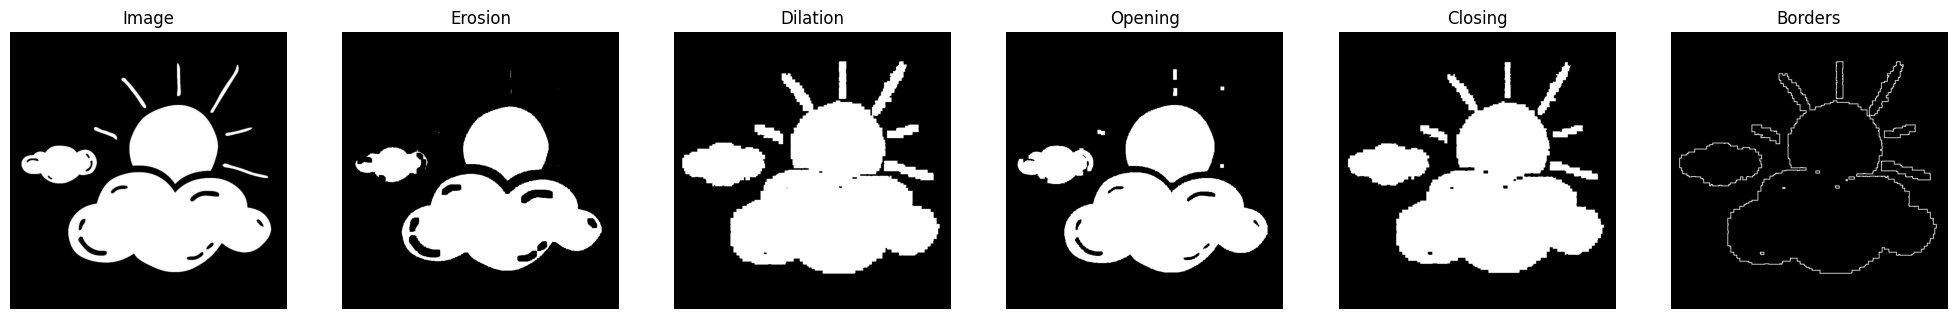

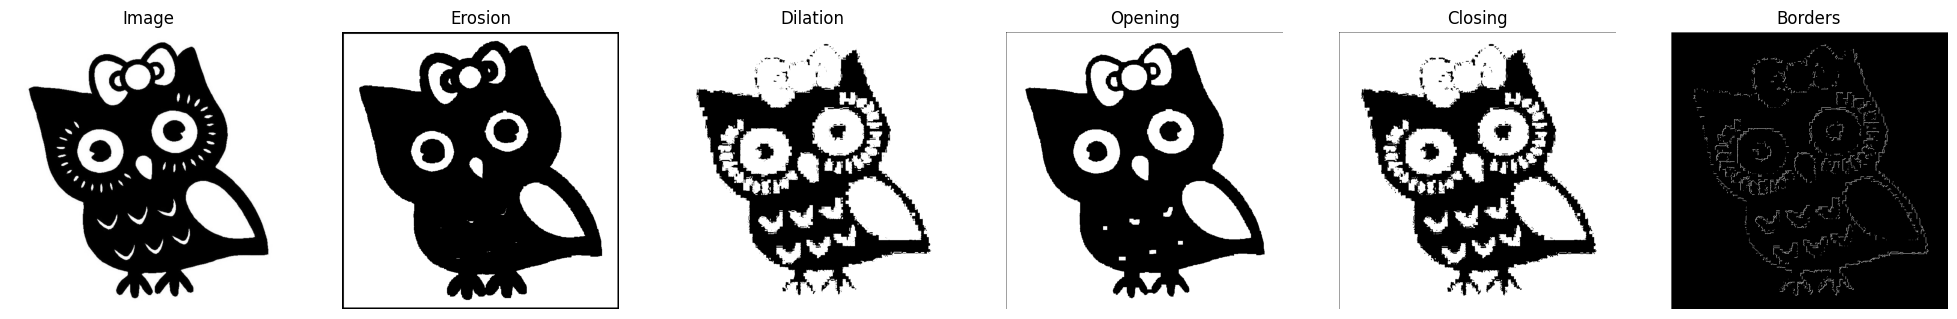

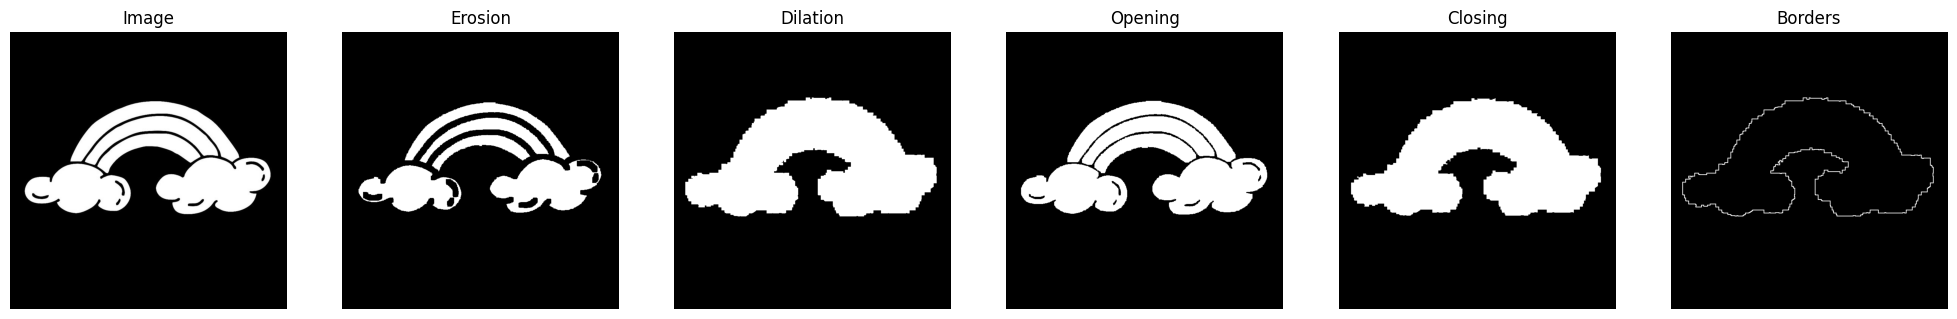

In [276]:
plt.figure(figsize=(25, 20))
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(erosion_img_1,  cmap="gray")
plt.title("Erosion")
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(dilation_img_1,  cmap="gray")
plt.title("Dilation")
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(opening_img_1,  cmap="gray")
plt.title("Opening")
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(closing_img_1,  cmap="gray")
plt.title("Closing")
plt.axis('off')
plt.subplot(1, 6, 6)
plt.imshow(borders_img_1,  cmap="gray")
plt.title("Borders")
plt.axis('off')

plt.figure(figsize=(25, 20))
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(erosion_img_2,  cmap="gray")
plt.title("Erosion")
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(dilation_img_2,  cmap="gray")
plt.title("Dilation")
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(opening_img_2,  cmap="gray")
plt.title("Opening")
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(closing_img_2,  cmap="gray")
plt.title("Closing")
plt.axis('off')
plt.subplot(1, 6, 6)
plt.imshow(borders_img_2,  cmap="gray")
plt.title("Borders")
plt.axis('off')

plt.figure(figsize=(25, 20))
plt.subplot(1, 6, 1)
plt.imshow(cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB))
plt.title("Image")
plt.axis('off')
plt.subplot(1, 6, 2)
plt.imshow(erosion_img_3,  cmap="gray")
plt.title("Erosion")
plt.axis('off')
plt.subplot(1, 6, 3)
plt.imshow(dilation_img_3,  cmap="gray")
plt.title("Dilation")
plt.axis('off')
plt.subplot(1, 6, 4)
plt.imshow(opening_img_3,  cmap="gray")
plt.title("Opening")
plt.axis('off')
plt.subplot(1, 6, 5)
plt.imshow(closing_img_3,  cmap="gray")
plt.title("Closing")
plt.axis('off')
plt.subplot(1, 6, 6)
plt.imshow(borders_img_3,  cmap="gray")
plt.title("Borders")
plt.axis('off')